In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from sqdtoolz.Experiment import Experiment
from sqdtoolz.HAL.GENvoltSource import*
from sqdtoolz.ExperimentConfiguration import*
from sqdtoolz.Laboratory import*
import qcodes as qc
import sqdtoolz as stz

In [ ]:
lab = Laboratory(instr_config_file= 'SMU_Keithley6430.yaml', save_dir=r"%USERPROFILE%/AQ Circuits/Operations - Documents/Data from UQ 2022 to 2024/Hardware/Instruments_testbed")

NameError: name 'Laboratory' is not defined

In [3]:
lab.load_instrument('smu')

Connected to: KEITHLEY INSTRUMENTS INC. 6430 (serial:4037337, firmware:C28   Jun 13 2011 12:31:43/A02  /F/B) in 0.59s


In [4]:
smu_module = GENsmu('vSMU', lab, ['smu'])

In [5]:
lab.HAL('vSMU').Mode = 'SrcI_MeasV'
lab.HAL('vSMU').Output = True
lab.HAL('vSMU').RampRateVoltage = 0.01
lab.HAL('vSMU').RampRateCurrent = 0.01
lab.HAL('vSMU').ComplianceCurrent = 0.1

In [6]:
lab.HAL('vSMU').ProbeType = 'FourWire'

In [7]:
stz.VariableProperty('V_jj', lab, lab.HAL('vSMU'), 'Voltage')
stz.VariableProperty('I_jj', lab, lab.HAL('vSMU'), 'Current')
stz.ExperimentConfiguration('I_sweep', lab, 0, ['vSMU'])

In [9]:
current_sweep = np.arange(0, 24e-6, 2e-6)

I_sweep = stz.Experiment("4_wire_Isweep", lab.CONFIG('I_sweep'))

leData = lab.run_single(I_sweep, [(lab.VAR('I_jj'), current_sweep)], 
                        rec_params = [(lab.HAL('vSMU'), 'SenseVoltage')], delay=0.2)

 |██████████████████████████████████████████████████| 100.0% Total time: 26.43s, Est. time left: 0.00s      


In [27]:
lab.HAL('vSMU').Output = False

# Test resistor measurement

3.978kOhms


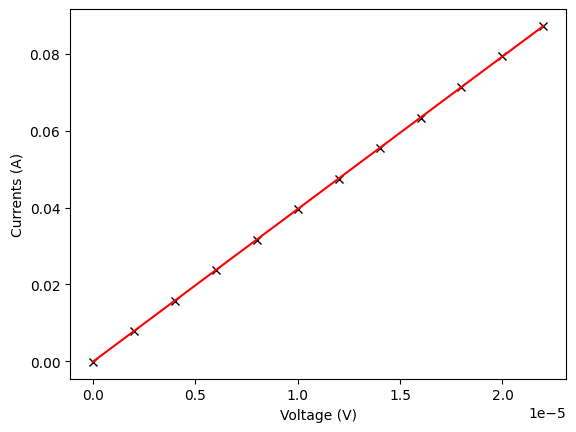

In [ ]:
arr = I_sweep.last_rec_params.get_numpy_array()
i_vals = I_sweep.last_rec_params.param_vals[0]
v_vals = arr[:,0]

m,b = np.polyfit(v_vals, i_vals, 1)
fit_currents = m*v_vals+b
resistance = 1/abs(m)   

plt.plot(i_vals, v_vals, 'kx')
plt.plot(fit_currents, v_vals, 'r')
plt.xlabel('Voltage (V)')
plt.ylabel('Currents (A)')
print(f'{(resistance/1000):0.3f}kOhms')